# PROPAGAÇÃO SIMPLES DE FEIXES

Para efetuar a estimativa da propagação de feixes utilizamos o `optical.beam.propagation` para tal no entanto necessitaremos informar o meio óptico onde estamos propagando a luz, que pode ser elementarmente construído pela função `optical.medium`.

> `optical.medium(n0)`
>
> > configura um meio óptico com índice de refração base `n0`.
>

não nos ateremos aqui aos argumenos opcionais dessa função dado que são abordados em exemplos de aplicações mais avançadas.

In [1]:
# muda o diretório para onde está optical/
%cd -q ../../

# módulo optical.beam: construtores de perfis iniciais
from optical import beam
# importa o método medium da biblioteca optical
from optical import medium

# módulo numpy: computação geral de matrizes
import numpy as np                  # importa numpy como "np"
# módulo matplotlib.pyplot: construção de representações gráficas
import matplotlib.pyplot as plt     # importa pyplot como "plt"

# construção da partição dos eixos do plano transversal
x = np.linspace(-40.,+40.,500);     # particiona (-40,+40) em 500
y = np.linspace(-40.,+40.,500);     # particiona (-40,+40) em 500

# construção da malha de pontos
X, Y = np.meshgrid(x, y);           # malha de pontos do plano

# criação de um feixe gaussiano
G = beam.create_G(w0 = 10., region = (X, Y));

# construção do vácuo como meio óptico
vacuo = medium(n0 = 1.0);

## ESTIMATIVA DA PROPAGAÇÃO DA LUZ NUM MEIO ÓPTICO

O método de estimativa mais elementar de propagação de feixes através de meios ópticos é o método `optical.beam.propagation.split_step` que computa os efeitos do meio na propagação por métodos espectrais.

> `optical.beam.propagation.split_step(U, region = (X, Y), z, medium)`
>
> > Estima, ao longo de `z` (partição de pontos no eixo de propagação), a propagação de `U`
> > através de `medium` (meio óptico) nos pontos de `region` (malha de pontos no plano
> > transversal) pelo método de split-step.

In [2]:
# importa o método split_step
from optical.beam.propagation import split_step

dz = np.linspace(0.0, 10.0, 20);    # particiona (0,2.0) em 20

### PERFIL TRANSVERSAL AO LONGO DA PROPAGAÇÃO

Em $z = 0 \mu{m}$ o perfil transversal do feixe gaussiano é:

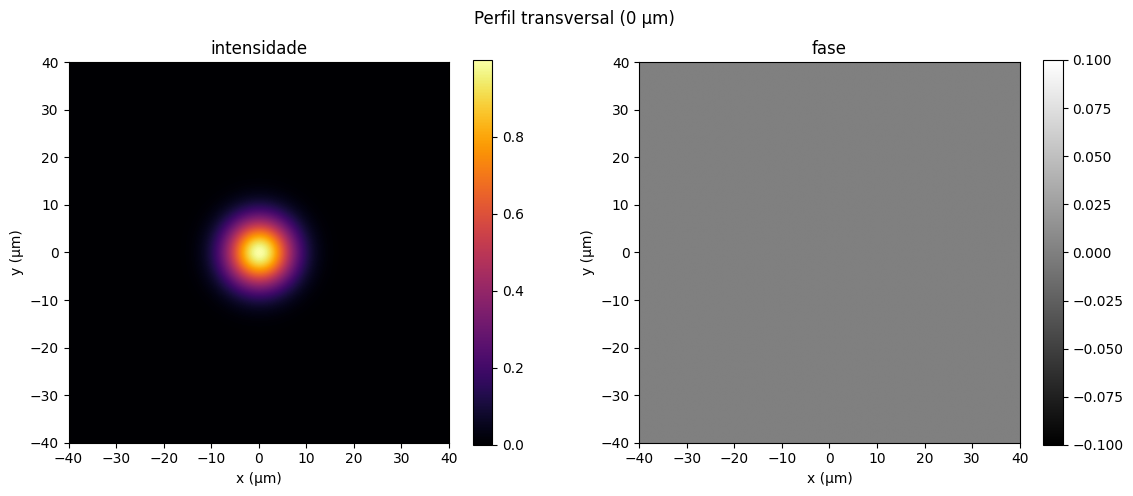

In [3]:
# exibe as imagens geradas em linha
%matplotlib inline

# cria a figura com dois subplots de tamanho (13.5, 5.0) em inches
fig, ax = plt.subplots(1, 2, figsize = (13.5, 5.0));
fig.suptitle('Perfil transversal (0 μm)')

# criação de gráfico no primeiro quadro
grafico = ax[0].imshow(
    np.abs(G) ** 2,                 # com valores de intensidade
    # com valores dos eixos
    extent = [
        x[0], x[-1],                # entre (x[0], x[-1])
        y[0], y[-1]                 # entre (y[0], y[-1])
    ],
    cmap = 'inferno'                # com mapa de cores 'inferno'
)
# insere a barra de cores da intensidade na figura
fig.colorbar(grafico);
# insere o título do primeiro quadro
ax[0].set_title('intensidade');
# renomeia os eixos do primeiro quadro
ax[0].set_xlabel('x (μm)');
ax[0].set_ylabel('y (μm)');

# criação de gráfico no segundo quadro
grafico = ax[1].imshow(
    np.angle(G),                    # com valores de fase
    # com valores dos eixos
    extent = [
        x[0], x[-1],                # entre (x[0], x[-1])
        y[0], y[-1]                 # entre (y[0], y[-1])
    ],
    cmap = 'gray'                   # com mapa de cores 'gray'
)
# inserir a barra de cores da fase na figura
fig.colorbar(grafico);
# insere o título do segundo quadro
ax[1].set_title('fase');
# renomeia os eixos do segundo quadro
ax[1].set_xlabel('x (μm)');
ax[1].set_ylabel('y (μm)');

ao propagá-lo no vácuo podemos visualizar sua variação ao longo do meio (esta célula apresenta apenas a imagem final, porém ao ser executa exibe o gráfico atualizado em tempo real):

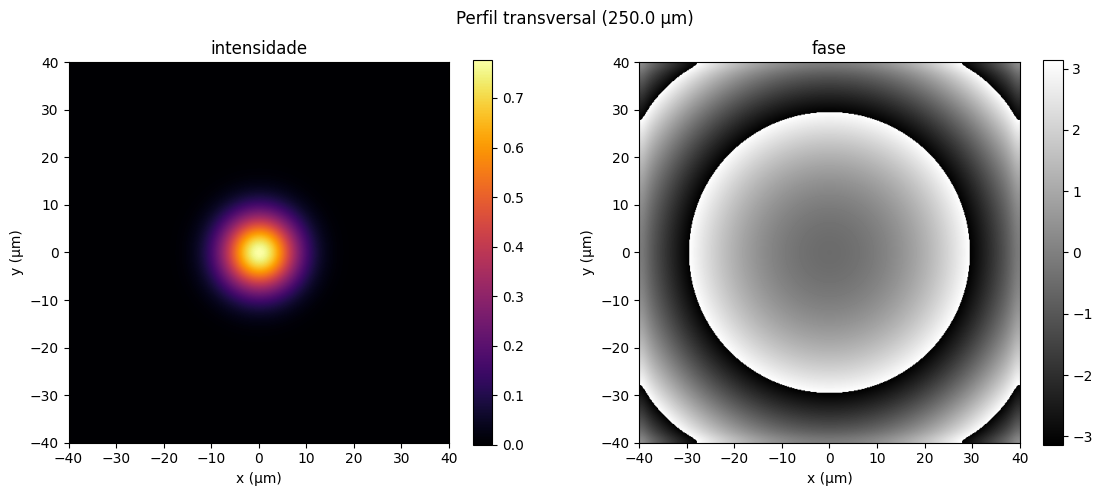

In [4]:
# exibe as imagens geradas em linha
%matplotlib inline

# importa o controle de display do IPython
from IPython.display import display, clear_output

# cria a figura com dois subplots de tamanho (13.5, 5.0) em inches
fig, ax = plt.subplots(1, 2, figsize = (13.5, 5.0));
fig.suptitle('Perfil transversal (0 μm)')

# criação de gráfico no primeiro quadro
grafico_intensidade = ax[0].imshow(
    np.abs(G) ** 2,                 # com valores de intensidade
    # com valores dos eixos
    extent = [
        x[0], x[-1],                # entre (x[0], x[-1])
        y[0], y[-1]                 # entre (y[0], y[-1])
    ],
    cmap = 'inferno'                # com mapa de cores 'inferno'
)
# insere a barra de cores da intensidade na figura
fig.colorbar(grafico_intensidade);
# insere o título do primeiro quadro
ax[0].set_title('intensidade');
# renomeia os eixos do primeiro quadro
ax[0].set_xlabel('x (μm)');
ax[0].set_ylabel('y (μm)');

# criação de gráfico no segundo quadro
grafico_fase = ax[1].imshow(
    np.angle(G),                    # com valores de fase
    # com valores dos eixos
    extent = [
        x[0], x[-1],                # entre (x[0], x[-1])
        y[0], y[-1]                 # entre (y[0], y[-1])
    ],
    cmap = 'gray'                   # com mapa de cores 'gray'
)
# inserir a barra de cores da fase na figura
fig.colorbar(grafico_fase);
# insere o título do segundo quadro
ax[1].set_title('fase');
# renomeia os eixos do segundo quadro
ax[1].set_xlabel('x (μm)');
ax[1].set_ylabel('y (μm)');

# inicializa o conteúdo mostrado
display(fig);
clear_output(wait = True);
plt.pause(0.5);

# efetuar a estimativa da propagação
for z in (10.0 + np.arange(0.0,250.0,10.0)):
    G = split_step(
        G,
        wavelength = 640e-3,
        region = (X,Y),
        z = dz,
        medium = vacuo
    );
    # atualiza o gráfico de intensidade
    grafico_intensidade.set_data(np.abs(G) ** 2);
    grafico_intensidade.autoscale();
    # atualiza o gráfico de fase
    grafico_fase.set_data(np.angle(G));
    grafico_fase.autoscale();
    # insere o título da figura
    fig.suptitle(f'Perfil transversal ({z} μm)');
    # atualiza o conteúdo mostrado
    display(fig);
    clear_output(wait = True);
    plt.pause(0.5);

onde observamos efeitos leves da reflexão pelas bordas de nossa janela computacional, iremos nos abster por ora de descrever como podemos impor uma condição de contorno eficiente para a mitigação de tais erros numéricos.